# 07-Dense-networks.ipynb


### 1.layer dense network i.e. no hidden layer, just the input and output ones

In [18]:
# Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.callbacks import History
from keras import regularizers
import numpy as np


In [19]:
# creating x and y

train_features = np.load('train_features.npz')['features']
train_labels = np.load('labelled_train_features.npz')['labels']
valid_features = np.load('valid_features.npz')['features']
valid_labels = np.load('labelled_valid_features.npz')['labels']
test_features = np.load('test_features.npz')['features']
test_labels = np.load('labelled_test_features.npz')['labels']

labels_df_train = pd.DataFrame(train_labels) 
labels_df_valid = pd.DataFrame(valid_labels) 
labels_df_test = pd.DataFrame(test_labels) 
y_tr = labels_df_train.values.ravel()
y_val = labels_df_valid.values.ravel()
y_te = labels_df_test.values.ravel()

features_df_train = pd.DataFrame(train_features) 
features_df_valid = pd.DataFrame(valid_features) 
features_df_test = pd.DataFrame(test_features)
X_tr = features_df_train.values
X_val = features_df_valid.values
X_te = features_df_test.values

In [20]:
# shapes I will use below
num_classes = 6  
input_shape =(X_tr.shape[1],)
n_samples = (X_tr.shape[0],)


### 1.1 Keras implemenmtation with no regularization

In [21]:
#creating of sequential model
model = Sequential() 

#adding dense layer
model.add(Dense(num_classes, activation='softmax', input_shape=input_shape))

#compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 7686      
                                                                 
Total params: 7686 (30.02 KB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# training the model
np.random.seed(0)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history= model.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_te, y_te))

Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 1.8963 - accuracy: 0.1857 - val_loss: 2.1109 - val_accuracy: 0.1800
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 1.7046 - accuracy: 0.2964 - val_loss: 2.0430 - val_accuracy: 0.1600
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 1.5710 - accuracy: 0.3714 - val_loss: 2.0350 - val_accuracy: 0.1800
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 1.4736 - accuracy: 0.3929 - val_loss: 1.9731 - val_accuracy: 0.2400
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 1.3929 - accuracy: 0.4464 - val_loss: 1.9616 - val_accuracy: 0.2000
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 1.3181 - accuracy: 0.5429 - val_loss: 1.9168 - val_accuracy: 0.3400
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 1.2326 - accuracy: 0.5821 - val_loss: 1.9555 - val_accuracy: 0.1800
Epoch 8/20
9/9 [=================

In [23]:
def loss_accuracy(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    return train_loss, val_loss, train_acc, val_acc


train_loss, val_loss, train_acc, val_acc = loss_accuracy(history)

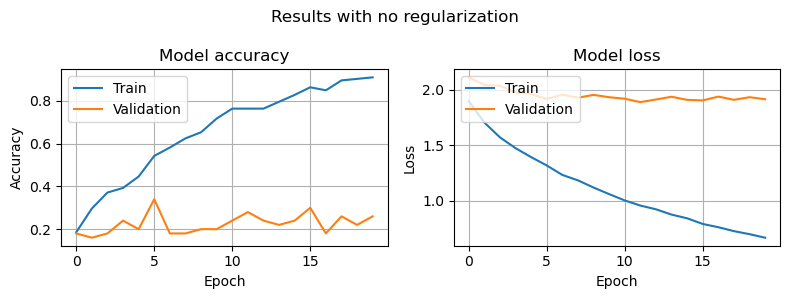

In [24]:
def plot_training_history(history, title):
    plt.figure(figsize=(8, 3))
    plt.suptitle(title)

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history, 'Results with no regularization')

strong overfitting.

### 1.2 Would regularization improve the results? (loose exploration)

I will see how applying different strength of regularization may impact the results (L2 in this case). The goal here is not to tune regularization's strength, just an brief exploration to get an idea.

#### regularization alpha = 0.01

Epoch 1/20
9/9 [==============================] - 1s 39ms/step - loss: 1.9661 - accuracy: 0.2500 - val_loss: 2.0455 - val_accuracy: 0.1600
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 1.7988 - accuracy: 0.3143 - val_loss: 2.1171 - val_accuracy: 0.1400
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 1.6734 - accuracy: 0.3750 - val_loss: 2.0971 - val_accuracy: 0.2000
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 1.5691 - accuracy: 0.4464 - val_loss: 2.0851 - val_accuracy: 0.1200
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 1.5003 - accuracy: 0.5036 - val_loss: 2.0598 - val_accuracy: 0.2000
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 1.4210 - accuracy: 0.5464 - val_loss: 2.0175 - val_accuracy: 0.1800
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 1.3549 - accuracy: 0.6214 - val_loss: 2.0106 - val_accuracy: 0.1800
Epoch 8/20
9/9 [=================

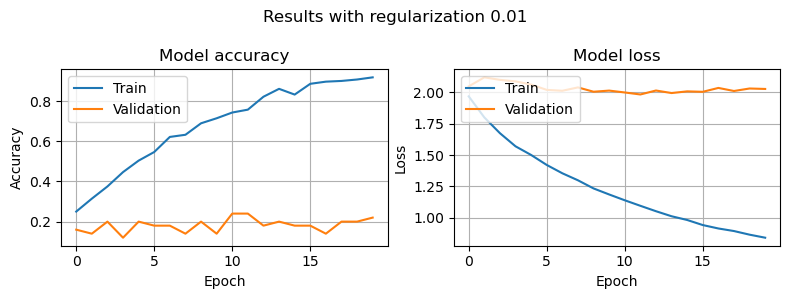

In [25]:


model2 = Sequential() 

#adding dense layer
model2.add(Dense(num_classes, activation='softmax', input_shape=input_shape,
                kernel_regularizer=regularizers.l2(0.01))) 

#compiling the model
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training the model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history2= model2.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_te, y_te))

#plotting

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history2)
plot_training_history(history2, 'Results with regularization 0.01')

its worse

### regularisation alpha = 0.1

Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 3.1188 - accuracy: 0.1893 - val_loss: 3.0202 - val_accuracy: 0.2600
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 2.7733 - accuracy: 0.2643 - val_loss: 2.9606 - val_accuracy: 0.1400
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 2.5470 - accuracy: 0.3071 - val_loss: 2.8697 - val_accuracy: 0.2200
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 2.3454 - accuracy: 0.3821 - val_loss: 2.7246 - val_accuracy: 0.1800
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 2.1919 - accuracy: 0.4750 - val_loss: 2.5873 - val_accuracy: 0.2400
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 2.0422 - accuracy: 0.5179 - val_loss: 2.5135 - val_accuracy: 0.2000
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 1.9344 - accuracy: 0.5429 - val_loss: 2.4279 - val_accuracy: 0.2200
Epoch 8/20
9/9 [=================

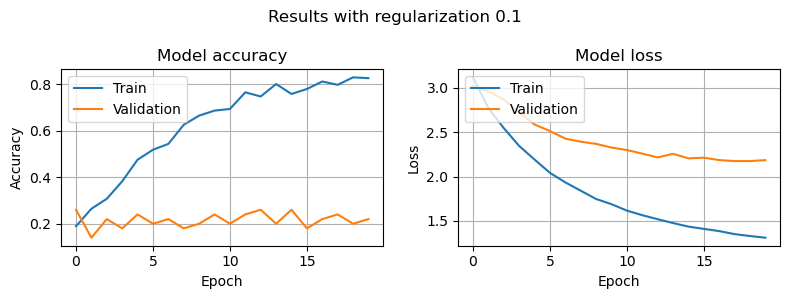

In [26]:
model3 = Sequential() 

#adding dense layer
model3.add(Dense(num_classes, activation='softmax', input_shape=input_shape,
                kernel_regularizer=regularizers.l2(0.1))) 

#compiling the model
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training the model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history3= model3.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_te, y_te))

#plotting

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history3)
plot_training_history(history3, 'Results with regularization 0.1')

results are worse

### regularisation alpha = 1

Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 12.3687 - accuracy: 0.1536 - val_loss: 10.1603 - val_accuracy: 0.3000
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 8.8729 - accuracy: 0.2429 - val_loss: 7.3432 - val_accuracy: 0.1400
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 6.3391 - accuracy: 0.2536 - val_loss: 5.3814 - val_accuracy: 0.1000
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 4.5823 - accuracy: 0.3107 - val_loss: 3.9929 - val_accuracy: 0.2000
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 3.4233 - accuracy: 0.3286 - val_loss: 3.1465 - val_accuracy: 0.1200
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 2.6849 - accuracy: 0.3964 - val_loss: 2.5803 - val_accuracy: 0.1600
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 2.2307 - accuracy: 0.4143 - val_loss: 2.2405 - val_accuracy: 0.3200
Epoch 8/20
9/9 [===============

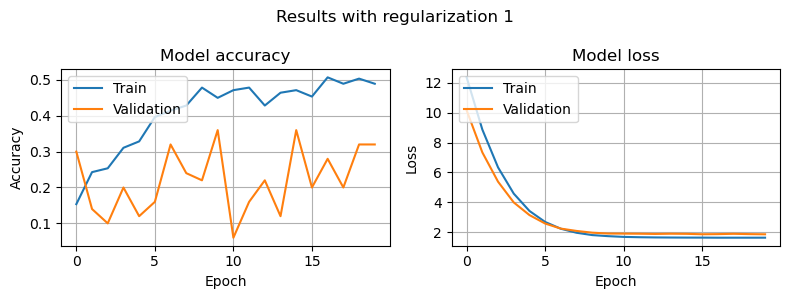

In [27]:
model4 = Sequential() 

#adding dense layer
model4.add(Dense(num_classes, activation='softmax', input_shape=input_shape,
                kernel_regularizer=regularizers.l2(1))) 

#compiling the model
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training the model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history4= model4.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_te, y_te))

#plotting

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history4)
plot_training_history(history4, 'Results with regularization 1')

results are very volatile but overfitting decreases on average

### regularisation alpha = 4

Epoch 1/20
9/9 [==============================] - 0s 19ms/step - loss: 42.1493 - accuracy: 0.1107 - val_loss: 33.2806 - val_accuracy: 0.0800
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 27.8585 - accuracy: 0.1571 - val_loss: 21.5436 - val_accuracy: 0.1400
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 17.8448 - accuracy: 0.1857 - val_loss: 13.6257 - val_accuracy: 0.1600
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 11.2304 - accuracy: 0.2107 - val_loss: 8.5610 - val_accuracy: 0.2200
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 7.0838 - accuracy: 0.2571 - val_loss: 5.4875 - val_accuracy: 0.1600
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 4.6121 - accuracy: 0.2821 - val_loss: 3.7124 - val_accuracy: 0.2000
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 3.2050 - accuracy: 0.3000 - val_loss: 2.7445 - val_accuracy: 0.2600
Epoch 8/20
9/9 [==========

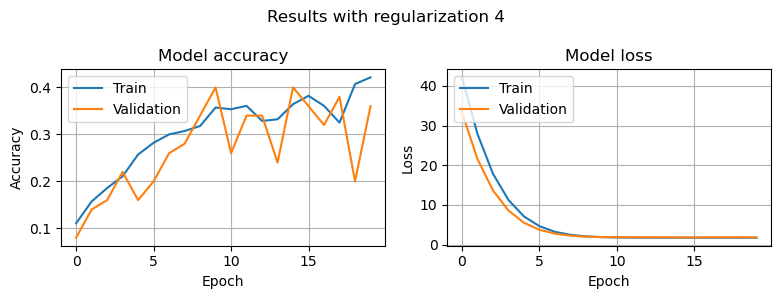

In [28]:
model5 = Sequential() 

#adding dense layer
model5.add(Dense(num_classes, activation='softmax', input_shape=input_shape,
                kernel_regularizer=regularizers.l2(4))) 

#compiling the model
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training the model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history5= model5.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_te, y_te))

#plotting

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history5)
plot_training_history(history5, 'Results with regularization 4')

Observation: <br>

One can observe that applying regularisation may improve or deteriorate the results depending to its strength. With high alpha validation accuracy may increase (with respect to no regularization) and the two curves approach which indicates weaker overfitting. The results are however very volatile which indicate the model is not stable /over-regularised. A fune tuning of alpha would be required here.
    

## 2. layer dense network i.e. one hidden layer


2.1 hiddel layer with low number of neurons in (50)

In [35]:
#Number of neurons in the hidden layer 
n_neurons = 50

# Create a sequential model
model2l = Sequential()

# Add the first dense layer
model2l.add(Dense(n_neurons, activation='relu', input_shape=(1280,)))

# Add the second dense layer
model2l.add(Dense(10, activation='softmax'))

# Compile the model
model2l.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model2l.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                64050     
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 64560 (252.19 KB)
Trainable params: 64560 (252.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Define loss function, optimizer and metrics to track during training
model2l.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
# Fit model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history2l = model2l.fit(
    x=X_tr,
    y=y_tr,
    validation_data=(X_te, y_te),
    batch_size=32,
    epochs=20,
    shuffle=True,  
)

Epoch 1/20
9/9 [==============================] - 0s 19ms/step - loss: 2.3641 - accuracy: 0.1607 - val_loss: 2.1858 - val_accuracy: 0.1800
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 2.0237 - accuracy: 0.2607 - val_loss: 2.1146 - val_accuracy: 0.1200
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 1.8899 - accuracy: 0.2536 - val_loss: 2.0608 - val_accuracy: 0.1200
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 1.8001 - accuracy: 0.3214 - val_loss: 2.0397 - val_accuracy: 0.1000
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 1.7205 - accuracy: 0.3179 - val_loss: 1.9979 - val_accuracy: 0.1600
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 1.6605 - accuracy: 0.3500 - val_loss: 1.9814 - val_accuracy: 0.1200
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 1.6054 - accuracy: 0.4000 - val_loss: 1.9674 - val_accuracy: 0.1400
Epoch 8/20
9/9 [=================

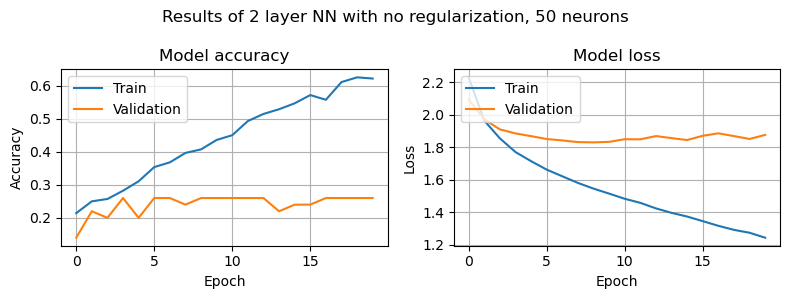

In [32]:
#plotting

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history2l)
plot_training_history(history2l, 'Results of 2 layer NN with no regularization, 50 neurons')

The accuracy is lower than in the 1 layer network, let's see if can be improved with more neurons in the hidden layer

#### 2.2 hiddel layer with higher number of neuromn  (200)

Epoch 1/20
9/9 [==============================] - 0s 19ms/step - loss: 2.2500 - accuracy: 0.2321 - val_loss: 2.1405 - val_accuracy: 0.2000
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 1.8817 - accuracy: 0.2643 - val_loss: 2.0140 - val_accuracy: 0.1800
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 1.7570 - accuracy: 0.2857 - val_loss: 1.9711 - val_accuracy: 0.1800
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 1.6868 - accuracy: 0.3214 - val_loss: 1.9508 - val_accuracy: 0.2200
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 1.6159 - accuracy: 0.3571 - val_loss: 1.9558 - val_accuracy: 0.1200
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 1.5621 - accuracy: 0.4143 - val_loss: 1.9336 - val_accuracy: 0.1800
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 1.5101 - accuracy: 0.4500 - val_loss: 1.9275 - val_accuracy: 0.1400
Epoch 8/20
9/9 [=================

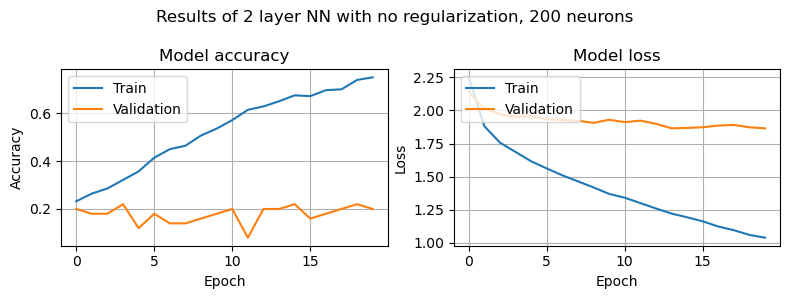

In [38]:
#Number of neurons in the hidden layer 
n_neurons = 200

# Create a sequential model
model2l = Sequential()

# Add the first dense layer
model2l.add(Dense(n_neurons, activation='relu', input_shape=(1280,)))

# Add the second dense layer
model2l.add(Dense(10, activation='softmax'))

# Compile the model
model2l.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define loss function, optimizer and metrics to track during training
model2l.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fit model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history2l = model2l.fit(
    x=X_tr,
    y=y_tr,
    validation_data=(X_te, y_te),
    batch_size=32,
    epochs=20,
    shuffle=True,  
)

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history2l)
plot_training_history(history2l, 'Results of 2 layer NN with no regularization, 200 neurons')

Observation: <br>
By increasing number of neurons in the hidden layer, we have got a very small performance gain. Let's add to it regularization of  arbitrary strength to see if the model could do better.


Epoch 1/20
9/9 [==============================] - 0s 19ms/step - loss: 298.4323 - accuracy: 0.2250 - val_loss: 241.6810 - val_accuracy: 0.2800
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 207.8537 - accuracy: 0.2571 - val_loss: 168.5909 - val_accuracy: 0.2600
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 144.9915 - accuracy: 0.2893 - val_loss: 117.8104 - val_accuracy: 0.2600
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 101.3143 - accuracy: 0.3036 - val_loss: 82.5100 - val_accuracy: 0.2400
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 70.9593 - accuracy: 0.3357 - val_loss: 57.9937 - val_accuracy: 0.1000
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 49.8641 - accuracy: 0.4036 - val_loss: 40.9310 - val_accuracy: 0.2200
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 35.2040 - accuracy: 0.3929 - val_loss: 29.0677 - val_accuracy: 0.2000
Epoch 8/20
9

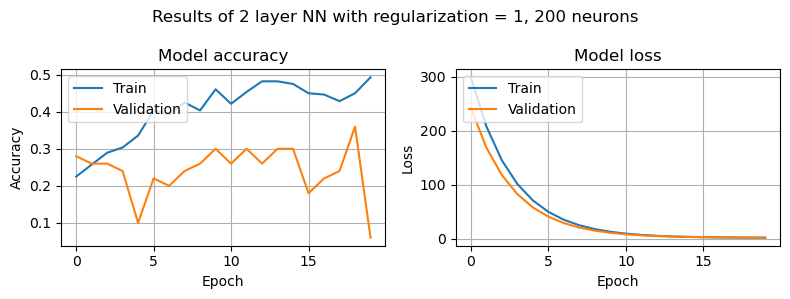

In [41]:

#Number of neurons in the hidden layer 
n_neurons = 200

# Create a sequential model
model2lr = Sequential()

# Add the first dense layer
model2lr.add(Dense(n_neurons, activation='relu', kernel_regularizer=regularizers.l2(1), input_shape=(1280,)))
                

# Add the second dense layer
model2lr.add(Dense(10, activation='softmax'))

# Compile the model
model2lr.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define loss function, optimizer and metrics to track during training
model2lr.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fit model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
np.random.seed(0)
history2lr = model2lr.fit(
    x=X_tr,
    y=y_tr,
    validation_data=(X_te, y_te),
    batch_size=32,
    epochs=20,
    shuffle=True,  
)

train_loss, val_loss, train_acc, val_acc = loss_accuracy(history2lr)
plot_training_history(history2lr, 'Results of 2 layer NN with regularization = 1, 200 neurons')



Observation: <br>
in this particular exampel, the model with strong regularisation yields higher validation accuracy than the one without it but it is also very volatile, which is not a desired property. This doesn't mean that another regularization strengts would not beat it but finding it is not the goal of this exercise. Plausibly, another combination of parameters would yields better results.